# ACT0402 - Manipulación de datos

    -Aplicando las técnicas de análisis y manipulación de datos vistas .

                                                                                                                            Alvaro Lucio-Villegas de Cea

In [45]:
#Importar Libreria.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:

# Esta línea de código importa el dataset WA_Fn-UseC_-Telco-Customer-Churn.csv a un dataframe llamado df
import pandas as pd
df = pd.read_csv('../datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Esta línea de código imprime la cantidad de filas del dataframe df
print(len(df))

# Esta línea de código imprime las primeras 5 filas del dataframe df 
df.head(5)



7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 2. Preparación de los datos

In [48]:

# Esta función imprime los nombres de las columnas que tienen valores faltantes en un DataFrame
def print_cols_with_missing_values(df):
    # Obtiene la suma de los valores nulos para cada columna
    cols_with_missing = df.isnull().sum()
    # Imprime las columnas que tienen valores nulos
    print(cols_with_missing[cols_with_missing > 0])



print_cols_with_missing_values(df)

Series([], dtype: int64)


In [49]:
df=df.drop(columns="customerID")

# 3. Normalización de los datos

In [50]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [51]:

# Reescribimos el código con comentarios
# Definimos una función lambda para reemplazar los espacios y guiones por guiones bajos
replacer = lambda str: str.lower().str.replace(' ', '_').str.replace('-', '_')
# Aplicamos la función a las columnas del dataframe
df.columns = replacer(df.columns.str)
# Iteramos sobre los objetos del dataframe para aplicar la misma función
for col in list(df.dtypes[df.dtypes == 'object'].index):
    df[col] = replacer(df[col].str)
# Definimos los nombres de las variables categóricas y numéricas 
categorical_feature_names = ['seniorcitizen', "phoneservice",'partner','multiplelines' , 'dependents','internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numeric_feature_names = ['tenure', 'monthlycharges', 'totalcharges']
# Creamos una lista con todos los nombres de las variables 
all_feature_names = numeric_feature_names + categorical_feature_names
# Definimos la variable objetivo 
target = 'churn'  # Variable objetivo (variable a predecir) 

# Convertimos los valores de total charges en 0 si es igual a "_" y convertimos el tipo de dato en float 
df["totalcharges"]=df["totalcharges"].apply(lambda x: 0 if x == '_' else x) # Si el valor es "_" lo convertimos en 0, sino lo mantenemos igual 
df["totalcharges"]=df["totalcharges"].astype(float) # Convertimos el tipo de dato en float


df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month_to_month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,no
7039,female,0,yes,yes,72,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,no
7040,female,0,yes,yes,11,no,no_phone_service,dsl,yes,no,no,no,no,no,month_to_month,yes,electronic_check,29.60,346.45,no
7041,male,1,yes,no,4,yes,yes,fiber_optic,no,no,no,no,no,no,month_to_month,yes,mailed_check,74.40,306.60,yes


In [52]:
import seaborn as sns


# Función para dibujar un histograma y un boxplot para una columna específica de un dataframe
def draw_hist_boxplot(df, feature_name):
    # Dibujar el histograma y el boxplot de la columna especificada
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

# Función para reemplazar los valores atípicos con la mediana de la columna especificada 
def replace_outliers_with_median(df, feature_name):
    # Calcular los cuartiles Q1, mediana y Q3 
    Q1 = df[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)

    # Calcular el rango intercuartil (IQR) 
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior del bigote 
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Reemplazar los valores atípicos con la mediana 
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])



C:\Users\Alvc00\AppData\Local\Temp\ipykernel_10208\2596874733.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numeric_feature_names].hist(ax=ax) # Generar un histograma para todas las características numéricas en el marco de datos df


array([[<AxesSubplot: title={'center': 'tenure'}>,
        <AxesSubplot: title={'center': 'monthlycharges'}>],
       [<AxesSubplot: title={'center': 'totalcharges'}>, <AxesSubplot: >]],
      dtype=object)

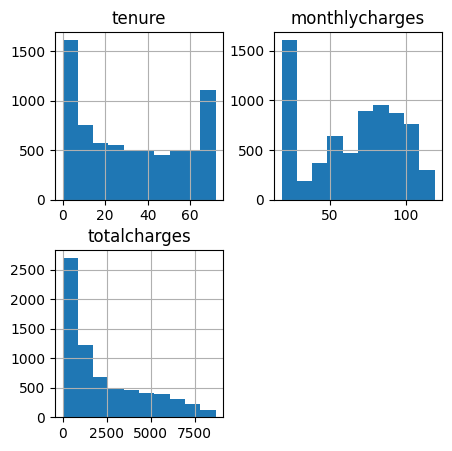

In [53]:

# Esta línea de código genera un histograma para todas las características numéricas en el marco de datos df.
# Se especifica el tamaño del gráfico como 5x5.

fig = plt.figure(figsize=(5,5)) # Crear una figura con tamaño 5x5
ax = fig.gca() # Obtener el eje actual de la figura
df[numeric_feature_names].hist(ax=ax) # Generar un histograma para todas las características numéricas en el marco de datos df


# df[numeric_feature_names].hist(ax=plt.figure(figsize=(5,5)).gca())

In [54]:
# plt.boxplot(df[numeric_feature_names])
# plt.show()
df[numeric_feature_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   monthlycharges  7043 non-null   float64
 2   totalcharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


C:\Users\Alvc00\AppData\Local\Temp\ipykernel_10208\1771057874.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numeric_feature_names].hist(ax=plt.figure(figsize=(5,5)).gca())


array([[<AxesSubplot: title={'center': 'tenure'}>,
        <AxesSubplot: title={'center': 'monthlycharges'}>],
       [<AxesSubplot: title={'center': 'totalcharges'}>, <AxesSubplot: >]],
      dtype=object)

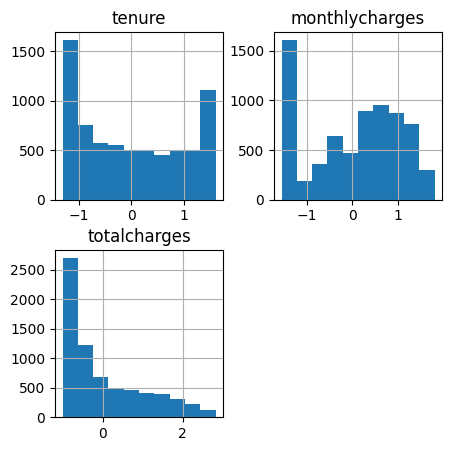

In [55]:
from sklearn.preprocessing import StandardScaler


# Se crea un objeto de la clase StandardScaler
scaler = StandardScaler()

# Se aplica el escalado a los atributos numéricos del DataFrame
df[numeric_feature_names] = scaler.fit_transform(df[numeric_feature_names])

# Se genera un histograma con los atributos numéricos escalados 
df[numeric_feature_names].hist(ax=plt.figure(figsize=(5,5)).gca())



# 4. Importancia de propiedades y división del conjunto de datos

<AxesSubplot: >

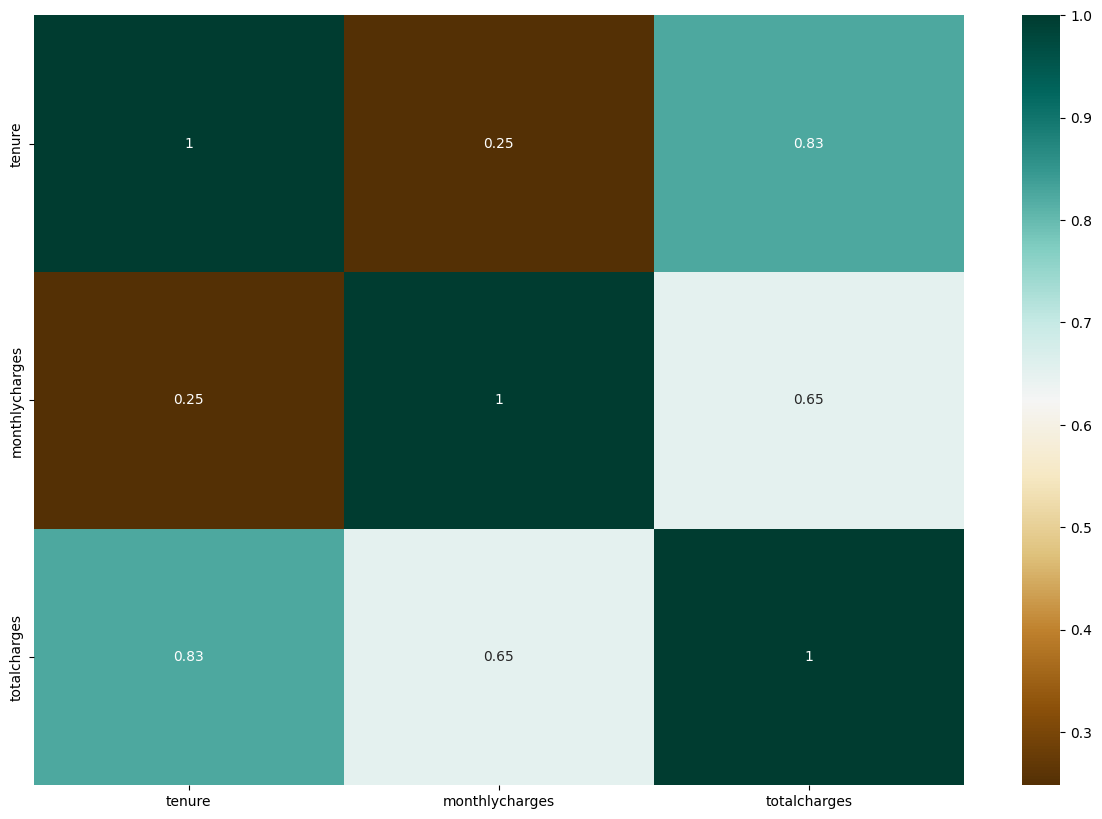

In [56]:
import seaborn as sns

# Crea una figura con un tamaño de 15x10
plt.figure(figsize=(15,10))

# Genera un mapa de calor con los nombres de las características numéricas del DataFrame y anota los valores
sns.heatmap(df[numeric_feature_names].corr(), cmap='BrBG', annot=True)




In [57]:
from sklearn.model_selection import train_test_split


# Importamos la función train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Separamos los datos en conjuntos de entrenamiento y prueba, usando una proporción del 80% para entrenamiento y 20% para prueba, con una semilla aleatoria 0
X_train_full, X_test = train_test_split(df[all_feature_names + [target]], test_size=0.2, random_state=0)

# Separamos los datos de entrenamiento en otros dos conjuntos: entrenamiento y validación, usando una proporción del 67% para entrenamiento y 33% para validación, con una semilla aleatoria 0 
X_train, X_val = train_test_split(X_train_full, test_size=0.33, random_state=0)




# Asignamos los valores de la variable objetivo a cada conjunto de datos
y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

# Eliminamos la columna de la variable objetivo de cada conjunto de datos 
X_train.drop([target], axis=1, inplace=True)
X_val.drop([target], axis=1, inplace=True)
X_test.drop([target], axis=1, inplace=True)

# Mostramos los primeros 5 registros del conjunto de entrenamiento 
X_train.head()



,tenure,monthlycharges,totalcharges,seniorcitizen,phoneservice,partner,multiplelines,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
6068,-0.829521,-0.671755,-0.793747,0,yes,no,no,yes,dsl,no,no,no,no,no,no,month_to_month,yes,electronic_check
3611,0.351370,1.159546,0.856166,0,yes,no,no,no,fiber_optic,no,yes,no,yes,yes,yes,two_year,yes,credit_card_(automatic)
4793,0.677133,1.146251,1.165193,0,yes,yes,no,no,fiber_optic,no,no,yes,yes,yes,yes,one_year,yes,credit_card_(automatic)
1737,-1.033122,-0.681725,-0.867491,0,yes,yes,no,no,dsl,no,no,no,no,no,no,month_to_month,yes,mailed_check
1534,1.491540,-1.494344,-0.371822,0,yes,yes,no,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,credit_card_(automatic)


# 5. Ingeniería de propiedades

In [58]:

# Creación de un diccionario a partir de los datos del conjunto de entrenamiento
train_dict = X_train[all_feature_names].to_dict(orient='records')

# Ordenamiento del primer elemento del diccionario creado
dict(sorted(train_dict[0].items()))



{'contract': 'month_to_month',
 'dependents': 'yes',
 'deviceprotection': 'no',
 'internetservice': 'dsl',
 'monthlycharges': -0.6717545979860794,
 'multiplelines': 'no',
 'onlinebackup': 'no',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'no',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': -0.8295205827584317,
 'totalcharges': -0.7937473230249428}

<AxesSubplot: >

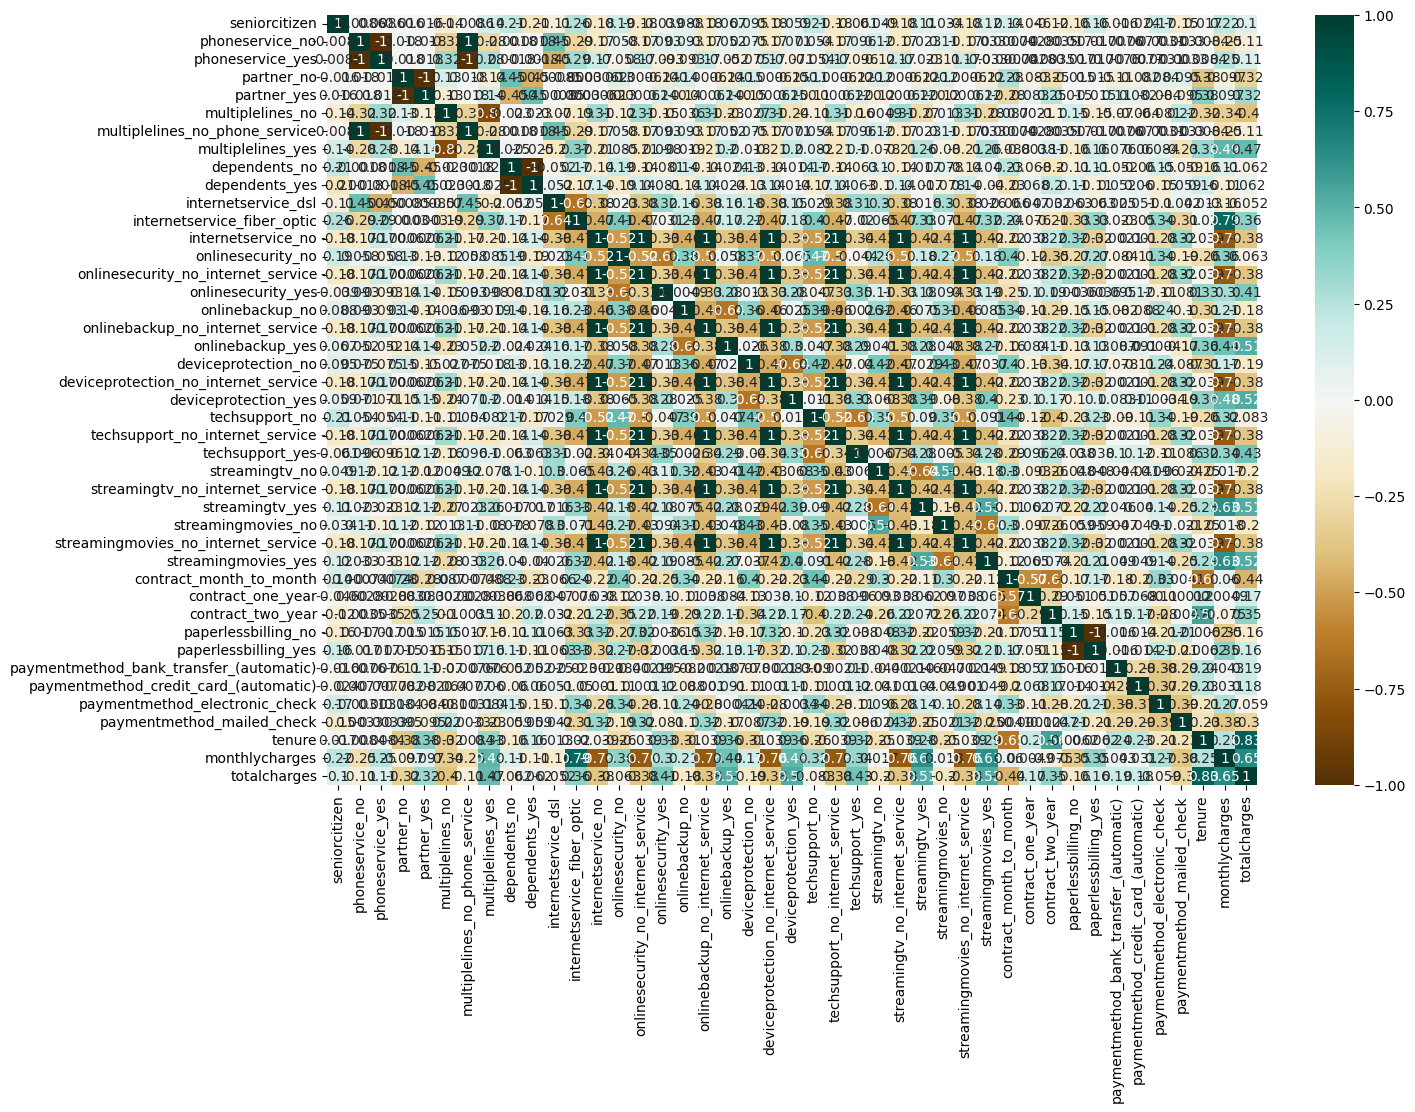

In [59]:
from sklearn.feature_extraction import DictVectorizer


df_correlacion=df



#Creación de un objeto DictVectorizer para convertir los diccionarios en vectores
dv = DictVectorizer(sparse=False) 
#Ajuste del objeto DictVectorizer al conjunto de entrenamiento
dv.fit(train_dict) 
#Transformación del conjunto de entrenamiento con el objeto DictVectorizer
X_train = dv.transform(train_dict) 

#Selección de la columna "churn" del dataframe df_correlacion para asignarla a la variable Y
Y=df_correlacion["churn"] 

#Transformación de los valores "yes" a 1 y los valores "no" a 0 en la variable Y mediante una función lambda
Y=Y.apply(lambda x: 1 if x=="yes" else 0) 

#Selección de todas las columnas menos "churn" del dataframe df_correlacion para asignarla a la variable X
X=df_correlacion.drop(columns=["churn"]) 
numericas=X[numeric_feature_names] 
categoricas=X[categorical_feature_names] 
#Creación de variables dummy para las características categóricas y asignación al dataframe categoricas_Dummies  
categoricas_Dummies=pd.get_dummies(categoricas)  


#Concatenación del dataframe categoricas_Dummies con el dataframe numericas, ignorando los índices y agregando como eje 1 (columns) para asignarlo al dataframe total correlación  
total_correlacion=pd.concat([categoricas_Dummies,numericas],ignore_index=False,axis=1)  

#Creación de una figura con tamaño 15x10 y creación de un mapa de calor con el dataframe total correlación, mostrando sus correlaciones y anotando los valores en cada celda  
plt.figure(figsize=(15,10))   #crea una figura con tamaño 15x10  
sns.heatmap(total_correlacion.corr(), cmap='BrBG', annot=True) #crea un mapa de calor con el df total correlaciòn




In [60]:
dv.get_feature_names_out()

array(['contract=month_to_month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'internetservice=dsl',
       'internetservice=fiber_optic', 'internetservice=no',
       'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',
       'streamingmovies=yes', '

# 6. Entrenamiento del modelo

In [61]:
from sklearn.linear_model import LogisticRegressionCV

# Distintos tipos de solver {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}


#Inicializar el modelo de regresión logística con los parámetros especificados
model = LogisticRegressionCV(cv=50, solver="lbfgs", max_iter=3000, random_state=0)

#Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)




LogisticRegressionCV(cv=50, max_iter=3000, random_state=0)

In [62]:
model.score(X_train, y_train)

0.8073661897191309

In [63]:

# Transformamos los datos de X_val para que sean compatibles con el modelo
X_val = dv.transform(X_val[all_feature_names].to_dict(orient='records'))

# Evaluamos el rendimiento del modelo usando los datos de validación
model.score(X_val, y_val)


0.806989247311828

In [64]:

# Transforma los datos de X_test usando el objeto dv
X_test = dv.transform(X_test[all_feature_names].to_dict(orient='records'))

# Predice los valores de y usando el modelo
y_pred = model.predict(X_test)

# Calcula el score del modelo con los datos de prueba X_test y y_test 
model.score(X_test, y_test)



0.7963094393186657

## Conclusión

En las tecnicas de analisis y manipulación de datos, estas son muy utiles a la hora de realizar cualquier estudio a gran escala de datos, al existir una cantidad muy grande de herramientas y tecnicas de tratamiento, hacen que la experiencia del analista obtenga gran importancia a la hora de realizar el estudio, ya que existen muchos procesos y tecnicas.